In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
spotify_data=pd.read_csv("SpotifyFeatures.csv")
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
spotify_features_df=spotify_data
genre_OHE=pd.get_dummies(spotify_features_df.genre)
key_OHE=pd.get_dummies(spotify_features_df.key)

In [4]:
scaled_features=MinMaxScaler().fit_transform([
    spotify_features_df['acousticness'].values, 
    spotify_features_df['danceability'].values, 
    spotify_features_df['duration_ms'].values, 
    spotify_features_df['energy'].values, 
    spotify_features_df['instrumentalness'].values, 
    spotify_features_df['liveness'].values, 
    spotify_features_df['loudness'].values, 
    spotify_features_df['speechiness'].values, 
    spotify_features_df['tempo'].values, 
    spotify_features_df['valence'].values
])

In [5]:
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [6]:
spotify_features_df = spotify_features_df.drop('genre', axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [7]:
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [8]:
spotify_features_df.head()

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,False,False,True,False,False,False,False,False,False,False
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,False,False,False,False,False,False,False,True,False,False
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,False,True,False,False,False,False,False,False,False,False
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,False,False,True,False,False,False,False,False,False,False
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,False,False,False,False,False,False,True,False,False,False


In [9]:
client_id = 'input_client_id'
client_secret= 'input_client_secret'

In [28]:
scope = 'user-library-read'
print("Requesting token")

Requesting token


In [136]:
token = util.prompt_for_user_token(
    scope, 
    client_id=client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:8011/callback'
)
token

'BQCNQTWNGoXB-w-nCKDXyuzC9MqmFZHo15TweW5V4ua4uM15JsgHkbL-pUWe1Hvcdxqsx_Gi89xa65S28KnuMB73oo0PT11gZiNZlIx6UCqMcu5XcUNvQei_Yw5PxBGw0W11k8xY0Jm-529h8qCQKyl2fzouIkztB6eX8JfADzQMy-gYmRLLZ63kq1TPWAlQkwXJN74'

In [137]:
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['id']
    playlist_cover_art[i['name']] = i['images'][0]['url'] if i['images'] else None


In [138]:
#check who is the current user
user = sp.current_user()
print(user['display_name'])


rt


In [139]:
#Check if the user has any playlists
#if the item is empty, the user has no playlists
response = sp.current_user_playlists()
print(response)


{'href': 'https://api.spotify.com/v1/users/31eo2bakhfwwoviihya7ahv6wboe/playlists?offset=0&limit=50', 'items': [{'collaborative': False, 'description': '', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2ISPyF3pRBCsnEPrTTcZhX'}, 'href': 'https://api.spotify.com/v1/playlists/2ISPyF3pRBCsnEPrTTcZhX', 'id': '2ISPyF3pRBCsnEPrTTcZhX', 'images': [{'height': 640, 'url': 'https://mosaic.scdn.co/640/ab67616d0000b2733f3a6fd24fb49e6dabf7c5bfab67616d0000b2736da83ea7813b3b8d1bd22a87ab67616d0000b27381b5fbf6470347967b819fe3ab67616d0000b273db726790bd619f4a95b78f6e', 'width': 640}, {'height': 300, 'url': 'https://mosaic.scdn.co/300/ab67616d0000b2733f3a6fd24fb49e6dabf7c5bfab67616d0000b2736da83ea7813b3b8d1bd22a87ab67616d0000b27381b5fbf6470347967b819fe3ab67616d0000b273db726790bd619f4a95b78f6e', 'width': 300}, {'height': 60, 'url': 'https://mosaic.scdn.co/60/ab67616d0000b2733f3a6fd24fb49e6dabf7c5bfab67616d0000b2736da83ea7813b3b8d1bd22a87ab67616d0000b27381b5fbf6470347967b819fe3ab67616d0000b

In [140]:
print(playlist_dic)

{'オヌヌメ': '2ISPyF3pRBCsnEPrTTcZhX', 'luv2': '4Z85Jmsyh7pIBqyObT5u7B', 'luv': '5sngC1li4149YWfgCR8NKw'}


In [141]:
#creating the playlist dataframe with extended features using Spotify data
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist
playlist_df = generate_playlist_df('luv', playlist_dic, spotify_data) 

In [142]:
playlist_df

,artist,track_name,track_id,url,date_added
6,Shawn Mendes,There's Nothing Holdin' Me Back,7JJmb5XwzOO8jgpou264Ml,https://i.scdn.co/image/ab67616d00001e02ea3ef7697cfd5705b8f47521,2023-04-22 14:09:08+00:00
5,Jeremy Zucker,comethru,18uwL0vNUanqZH0ro2QcOP,https://i.scdn.co/image/ab67616d00001e02cb16227d90152c2a5022bba1,2023-04-22 14:08:52+00:00
4,Avicii,The Nights,0ct6r3EGTcMLPtrXHDvVjc,https://i.scdn.co/image/ab67616d00001e020ae4f4d42e4a09f3a29f64ad,2023-04-22 14:08:32+00:00
2,The Chainsmokers,Something Just Like This,6RUKPb4LETWmmr3iAEQktW,https://i.scdn.co/image/ab67616d00001e020c13d3d5a503c84fcc60ae94,2023-04-22 14:07:58+00:00
0,Ed Sheeran,Castle on the Hill,6PCUP3dWmTjcTtXY02oFdT,https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96,2023-04-22 14:07:32+00:00


In [143]:
import requests
from io import BytesIO

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15, int(0.625 * len(temp))), facecolor='#FFFFFF')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(int(len(temp) / columns) + 1, columns, i + 1)

        response = requests.get(url)
        image = io.imread(BytesIO(response.content))
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s = '' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize=10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()


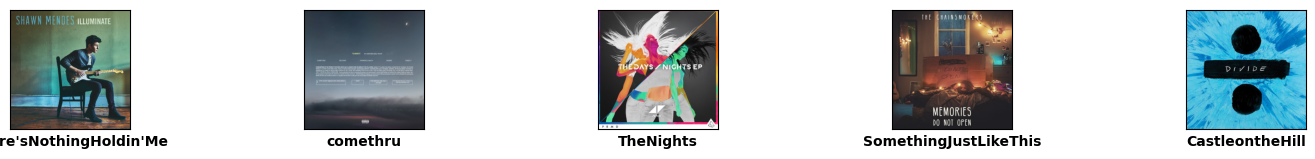

In [144]:
visualize_cover_art(playlist_df)

In [145]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    
    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [146]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.shape)

(50,)
(232717, 50)


### Perform Cosine Similarity Between Playlist Vector and Songs in the Playlist

In [147]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [155]:
def generate_recommendation_CS(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [156]:
top15_CS = generate_recommendation_CS(spotify_data, playlist_vector, nonplaylist_df)  
top15_CS

/var/folders/dv/40_bl8rj3v1frvtr4wrr9cy00000gn/T/ipykernel_46467/2510129675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
108667,Pop,Alec Benjamin,Boy In The Bubble,60cYr5uuMoxvyuIx45rGEW,73,0.000043,0.000046,1.0,0.000045,0.000042,B,0.000043,0.0,Minor,0.000042,0.000834,4/4,0.000046,0.895979,https://i.scdn.co/image/ab67616d00001e02459d675aa0b6f3b211357370
107940,Pop,Bryce Vine,Drew Barrymore,0OgGn1ofaj55l2PcihQQGV,78,0.000041,0.000042,1.0,0.000041,0.000038,B,0.000039,0.0,Minor,0.000039,0.000836,4/4,0.000040,0.895979,https://i.scdn.co/image/ab67616d00001e023390cb0fc677f87704d246f3
149844,Pop,"Tyler, The Creator",Tamale,60b6B2ULC85t4Y5IjZvP7A,61,0.000044,0.000048,1.0,0.000049,0.000043,B,0.000045,0.0,Major,0.000044,0.000825,4/4,0.000049,0.895979,https://i.scdn.co/image/ab67616d00001e0222007a4aa8a55fe7b1de5632
110539,Pop,Shawn Mendes,Mutual,5gW3kI83886nVV9apaFLWu,71,0.000047,0.000051,1.0,0.000048,0.000045,B,0.000046,0.0,Minor,0.000046,0.000820,4/4,0.000051,0.895979,https://i.scdn.co/image/ab67616d00001e02269423eb6467e308c0fbce24
110273,Pop,Eve 6,Inside Out,4GiVcDqNQI0fc0yYuRGH9m,68,0.000035,0.000037,1.0,0.000039,0.000035,B,0.000037,0.0,Major,0.000035,0.000835,4/4,0.000038,0.895979,https://i.scdn.co/image/ab67616d00001e02859d6607e67a7bea86f9e924
150515,Pop,FINNEAS,Claudia,04oG24PjVs59q72Id8wXFK,63,0.000051,0.000052,1.0,0.000050,0.000047,B,0.000049,0.0,Minor,0.000048,0.000820,4/4,0.000051,0.895979,https://i.scdn.co/image/ab67616d00001e021883ddfaf431d09757734b57
110555,Pop,Louis The Child,Slow Down Love (feat. Chelsea Cutler),0z95CqBxQnSQhNnoWTZJKL,66,0.000053,0.000053,1.0,0.000053,0.000049,B,0.000050,0.0,Minor,0.000051,0.000855,4/4,0.000051,0.895979,https://i.scdn.co/image/ab67616d00001e02d8140fb4748ebcef533d9b35
149658,Pop,Nicki Minaj,Your Love,3bGxiCPouq52ZtI8ybMCX5,56,0.000042,0.000043,1.0,0.000044,0.000042,B,0.000043,0.0,Major,0.000043,0.000815,4/4,0.000042,0.895979,https://i.scdn.co/image/ab67616d00001e0270b8b4f85ef33b4d81bcaea6
111428,Pop,Quavo,LAMB TALK,3nmfktGzQJe0B77Ilcce1o,66,0.000039,0.000043,1.0,0.000041,0.000038,B,0.000038,0.0,Minor,0.000039,0.000861,4/4,0.000040,0.895979,https://i.scdn.co/image/ab67616d00001e02c01a2d2ed3673fd3b800c13a
150771,Pop,Langhorne Slim,The Way We Move,40rjypnguxfhPy4Bbv5SWc,62,0.000033,0.000035,1.0,0.000037,0.000032,B,0.000034,0.0,Major,0.000032,0.000835,4/4,0.000036,0.895979,https://i.scdn.co/image/ab67616d00001e02f5570414240d702e86976eba


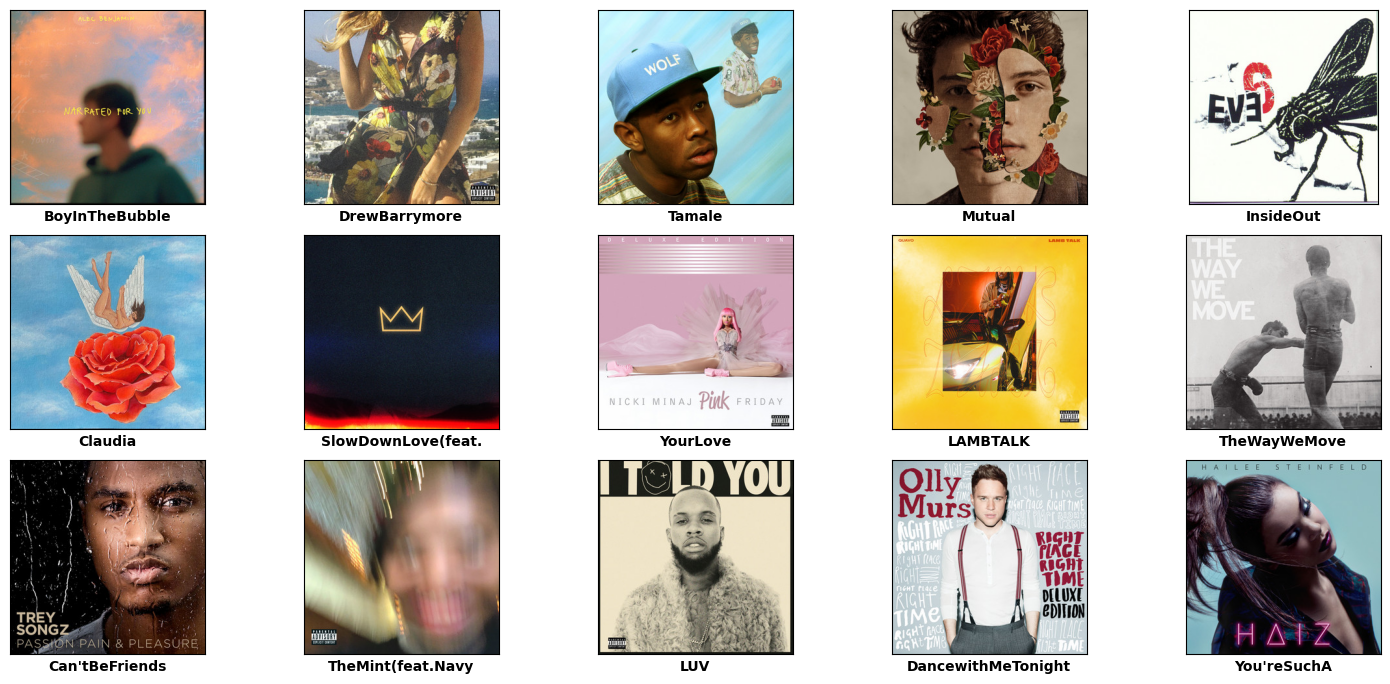

In [157]:
visualize_cover_art(top15_CS)

### Perform Euclidean Distance Between Playlist Vector and Songs in the Playlist

In [158]:
from sklearn.metrics.pairwise import euclidean_distances

In [159]:
def generate_recommendation_ED(sp, playlist_vector, nonplaylist_df):
    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['euclidean_dist'] = euclidean_distances(nonplaylist_df.drop(['track_id'], axis=1).values, playlist_vector.drop(labels='track_id').values.reshape(1, -1))[:, 0]
    
    non_playlist_top15 = non_playlist.nsmallest(15, 'euclidean_dist')
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    non_playlist_top15['popularity'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['popularity'])
    non_playlist_top15['liveness'] = non_playlist_top15['track_id'].apply(lambda x: sp.audio_features(x)[0]['liveness'])
    
    return non_playlist_top15

In [160]:
top15_ED = generate_recommendation_ED(sp, playlist_vector, nonplaylist_df)
print(top15_ED)

/var/folders/dv/40_bl8rj3v1frvtr4wrr9cy00000gn/T/ipykernel_46467/3331240221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['euclidean_dist'] = euclidean_distances(nonplaylist_df.drop(['track_id'], axis=1).values, playlist_vector.drop(labels='track_id').values.reshape(1, -1))[:, 0]


       genre    artist_name                                 track_name                track_id  popularity  acousticness  danceability  duration_ms    energy  instrumentalness key  liveness  loudness   mode  speechiness     tempo time_signature   valence  euclidean_dist                                                               url
109344   Pop    Kodak Black                     If I'm Lyin, I'm Flyin  7HdNB8nvJOBwHa8hIkzvxp          62      0.000043      0.000048          1.0  0.000047          0.000042   B    0.1860       0.0  Minor     0.000044  0.001388            4/4  0.000045        9.433982  https://i.scdn.co/image/ab67616d00001e02f9508eb3070b95ceeb82788b
112600   Pop        Bazanji                                       2019  3VRxFM7wiJYKNHvouPZhaH           0      0.000048      0.000052          1.0  0.000054          0.000047   B    0.1600       0.0  Minor     0.000048  0.001357            4/4  0.000049        9.433982  https://i.scdn.co/image/ab67616d00001e024fb14cd9f4cb5d

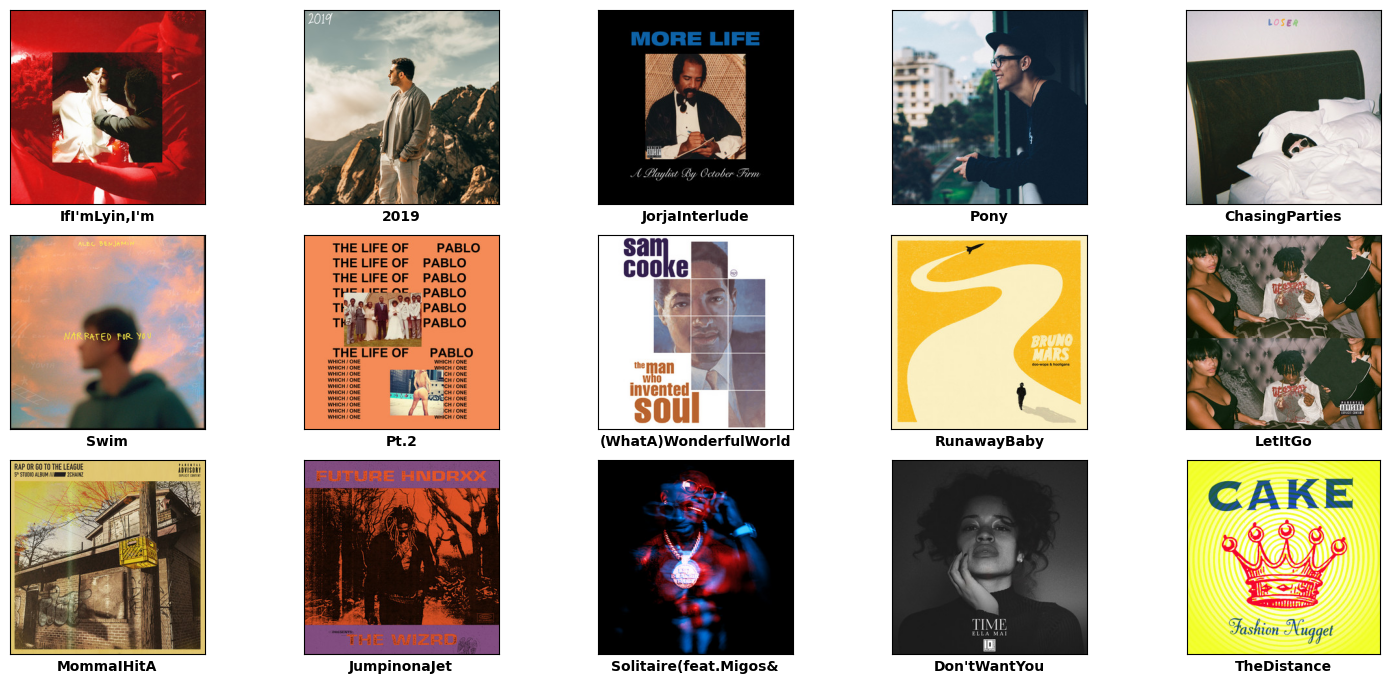

In [161]:
visualize_cover_art(top15_ED)

### Perform Manhattan Distance Between Playlist Vector and Songs in the Playlist

In [163]:
from sklearn.metrics.pairwise import manhattan_distances

In [164]:
def generate_recommendation_MD(sp, playlist_vector, nonplaylist_df):
    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['dist'] = manhattan_distances(nonplaylist_df.drop(['track_id'], axis=1).values,
                                               playlist_vector.drop(labels='track_id').values.reshape(1, -1))[:, 0]
    non_playlist_top15 = non_playlist.sort_values('dist', ascending=True).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])

    return non_playlist_top15

In [165]:
top15_MD = generate_recommendation_MD(sp, playlist_vector, nonplaylist_df)
print(top15_MD)

/var/folders/dv/40_bl8rj3v1frvtr4wrr9cy00000gn/T/ipykernel_46467/657263146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['dist'] = manhattan_distances(nonplaylist_df.drop(['track_id'], axis=1).values,


        genre          artist_name                                 track_name                track_id  popularity  acousticness  danceability  duration_ms    energy  instrumentalness key  liveness  loudness   mode  speechiness     tempo time_signature   valence       dist                                                               url
20385   Dance          Duran Duran                                      Intro  47kDjoaIpWHZiqWaqAxDjq          30      0.000228      0.000233          1.0  0.000234          0.000226   C  0.000239       0.0  Major     0.000227  0.002049            4/4  0.000230  21.002869  https://i.scdn.co/image/ab67616d00001e0283cd65ddb6af8893448d0b20
112720    Pop              Solange      Nothing Without Intention (interlude)  0uKYWr9wbXWXfQtyWGMItp          28      0.000571      0.000578          1.0  0.000571          0.000550   C  0.000555       0.0  Major     0.000562  0.005488            4/4  0.000576  21.002918  https://i.scdn.co/image/ab67616d00001e02b1150f77

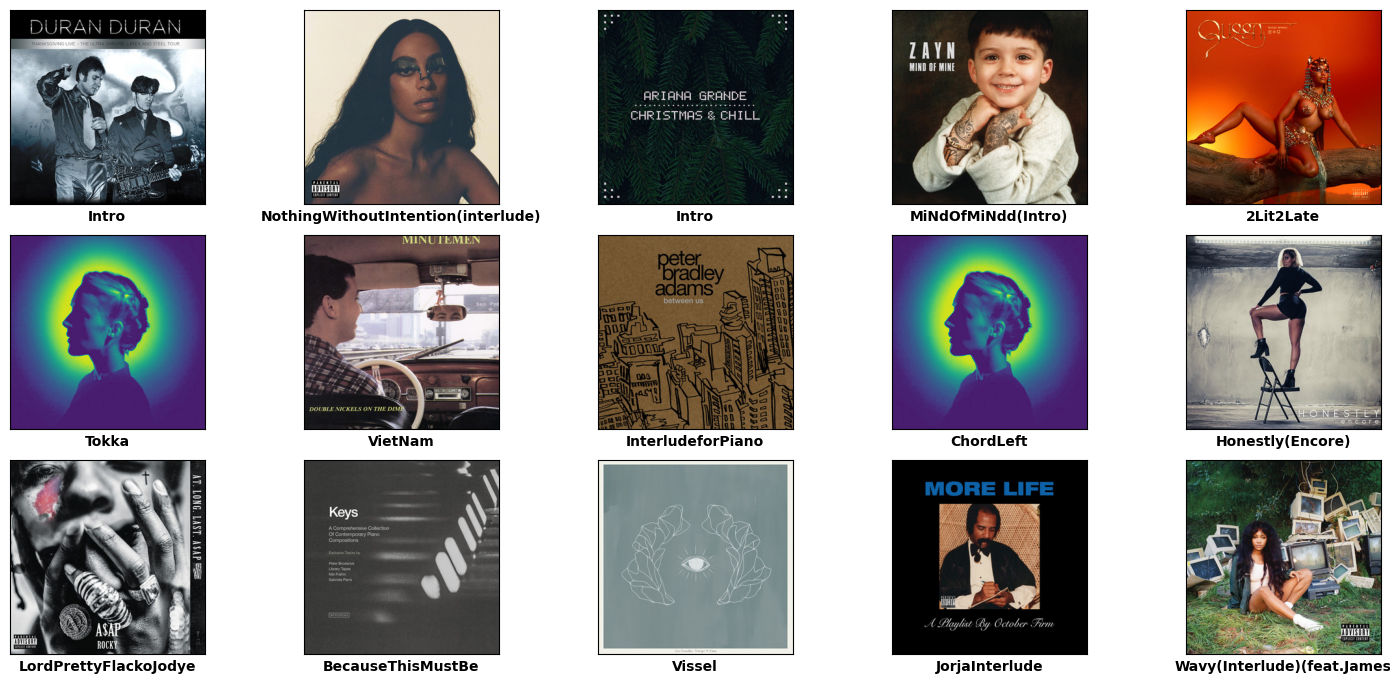

In [166]:
visualize_cover_art(top15_MD)